# ***EXAMEN DE LABORATORIO DE SIS420***

# REDES NEURONALES - Regresión Logística Binaria

## Librearias a aplicar:

In [3]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
import matplotlib.pyplot as plt

import pandas as pd

# Modulo de optimización de scipy
from scipy import optimize

#Para separa el Dataset 20% y 80% para diferentes pruebas
from sklearn.model_selection import train_test_split

# Para normalizar los datos de entrenamiento
from sklearn.preprocessing import StandardScaler

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

## **1: Preprocesamiento de Datos**

### Información del dataset

### Acerca del conjunto de datos

#### Contexto

Estos son los datos completos de préstamos de LendingClub para todos los préstamos emitidos durante el período de tiempo indicado en el área de EE. UU.

LendingClub es una empresa estadounidense de préstamos entre particulares, con sede en San Francisco, California. Fue el primer prestamista peer-to-peer en registrar sus ofertas como valores en la Comisión de Bolsa y Valores (SEC) y en ofrecer operaciones de préstamos en un mercado secundario.

Lending Club permite a los prestatarios crear préstamos personales sin garantía de entre $1,000 y $40,000. El período estándar del préstamo es de tres años. Los inversores pueden buscar y navegar por los listados de préstamos en el sitio web de Lending Club y seleccionar los préstamos en los que desean invertir en función de la información proporcionada sobre el prestatario, el monto del préstamo, el grado del préstamo y el propósito del préstamo. Los inversores ganan dinero con los intereses. Lending Club gana dinero cobrando a los prestatarios una comisión de originación y a los inversores una comisión de servicio.

#### Contenido

El conjunto de entrenamiento consta de datos de préstamos de 2007 a 2015 y el conjunto de datos de prueba contiene datos de préstamos de 2016 a 2017.

Se han proporcionado códigos estatales de EE. UU. con su nombre completo para la creación de mapas.

### Agradecimientos

Los datos de los préstamos se han adquirido del sitio web oficial de LendingClub y de los códigos estatales de EE. UU. y sus nombres se han adquirido de Wikipedia.

### Inspiración

- Puede analizar los datos y obtener información sobre los préstamos emitidos hasta la fecha.

- Predecir qué préstamo incumplirá con los pagos.

- Análisis de texto y sentimiento

- Análisis de series temporales


### Objetivo.
En este modelo daremos un estudio al dataset "*Préstamos emitidos por LendingClub*" donde veremso préstamos emitido entre 2016 a 2017, el objetivo es predecir que préstamos incumpliran con los pagos. Este dataset contiene 40 caracteristicas las cuales contienen las mas importantes informaciones sobre los solicitantes de préstamos.


In [70]:
# Cargar datos
data = pd.read_csv('./lc_2016_2017.csv', delimiter=',')


# Configurar Pandas para que no corte la visualización
pd.set_option('display.max_rows', 100)  # Mostrar todas las filas (80 -> None)
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas (20 -> None)

# Mostramos los datos
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,69802332,NaN,8400,8400,8400.0,36 months,11.99,278.97,C,C1,Accounting Manager,8 years,MORTGAGE,80000.0,Verified,Jan-2016,Current,n,NaN,debt_consolidation,Debt consolidation,302xx,GA,18.92,1,Aug-1998,1.0,23.0,59.0,31,2,11806.0,70.3,42,f,3627.88,3627.88,6141.250000,6141.25,4772.12,1369.13,0.0,0.0,0.0,Dec-2017,278.97,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,329237.0,3.0,1.0,3.0,4.0,157614.0,96.0,3.0,7.0,2881.0,94.0,16800.0,1.0,0.0,4.0
1,105668881,NaN,25000,25000,25000.0,36 months,11.49,824.29,B,B5,Registered Nurse,3 years,MORTGAGE,99000.0,Not Verified,Apr-2017,Fully Paid,n,NaN,debt_consolidation,Debt consolidation,722xx,AR,26.29,0,Oct-2006,0.0,NaN,NaN,11,0,24234.0,46.5,21,w,0.00,0.00,26560.060933,26560.06,25000.00,1560.06,0.0,0.0,0.0,Nov-2017,21630.28,NaN,Nov-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,272059.0,0.0,0.0,1.0,21.0,95306.0,NaN,1.0,2.0,11172.0,47.0,52100.0,0.0,3.0,0.0
2,92817326,NaN,8000,8000,8000.0,36 months,11.49,263.78,B,B5,Firman,10+ years,MORTGAGE,41000.0,Not Verified,Nov-2016,Fully Paid,n,NaN,debt_consolidation,Debt consolidation,465xx,IN,13.00,0,Aug-2003,0.0,NaN,NaN,7,0,7262.0,38.0,14,w,0.00,0.00,8254.881898,8254.88,8000.00,254.88,0.0,0.0,0.0,Feb-2017,7732.43,NaN,Sep-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,82895.0,1.0,1.0,1.0,5.0,16122.0,96.0,0.0,2.0,5096.0,65.0,19100.0,0.0,4.0,2.0
3,88016605,NaN,12000,12000,12000.0,36 months,11.49,395.66,B,B5,foreman,10+ years,RENT,48000.0,Verified,Aug-2016,Current,n,NaN,debt_consolidation,Debt consolidation,934xx,CA,29.20,0,Jul-2002,1.0,31.0,NaN,14,0,13508.0,56.0,21,w,7170.37,7170.37,6315.240000,6315.24,4829.63,1485.61,0.0,0.0,0.0,Dec-2017,395.66,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,31013.0,1.0,0.0,1.0,20.0,17505.0,60.0,2.0,4.0,2073.0,58.0,24100.0,0.0,0.0,1.0
4,92719338,NaN,10000,10000,10000.0,36 months,21.49,379.28,D,D5,Carpenter (dept. 252),< 1 year,RENT,51000.0,Source Verified,Nov-2016,Current,n,NaN,house,Home buying,064xx,CT,7.29,0,Jul-2013,3.0,NaN,NaN,4,0,414.0,7.7,5,f,7098.59,7098.59,4900.790000,4900.79,2901.41,1999.38,0.0,0.0,0.0,Dec-2017,379.28,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,13474.0,1.0,1.0,1.0,5.0,13060.0,94.0,2.0,3.0,264.0,70.0,5400.0,4.0,1.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,110707143,NaN,3600,3600,3600.0,36 months,18.06,130.26,D,D2,NaN,NaN,RENT,28000.0,Source Verified,Jun-2017,Current,n,NaN,debt_consolidation,Debt consolidation,955xx,CA,5.70,0,May-1994,0.0,68.0,NaN,4,0,3907.0,55.0,26,f,3126.00,3126.00,774.340000,774.34,474.00,300.34,0.0,0.0,0.0,Dec-2017,130.26,Jan-2018,Dec-2017,0,68.0,1,Individual,NaN,NaN,NaN,0,203.0,3907.0,3.0,0.0,0.0,100.0,0.0,NaN,4.0,5.0,1965.0,55.0,7100.0,4.0,0.0,2.0
39996,72563875,NaN,35000,35000,35000.0,36 months,14.46,1204.06,C,C4,Asst Sales Manager,5 years,RENT,135000.0,Source Verified,Feb-2016,Current

In [156]:
pd.set_option('display.max_rows', 100)  # Mostrar todas las filas
pd.set_option('display.max_columns', 50)  # Mostrar todas las columnas

Eliminamos las columnas que no aportan nada o que no contienen informacion para aplicar el modelo

In [24]:
# Lista de columnas que deseas eliminar
columns_to_drop = ['id', 'member_id', 'term', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 
                    'issue_d', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'delinq_2yrs', 'earliest_cr_line', 'mths_since_last_delinq', 
                    'initial_list_status', 'mths_since_last_record', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 
                    'tot_coll_amt']

# eliminar las columnas mencionadas del dataset 
data = data.drop(columns=columns_to_drop)

In [25]:
data

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,loan_status,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,tot_cur_bal,open_acc_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,8400,8400,8400.0,11.99,80000.0,Current,18.92,1.0,31,2,11806.0,70.3,42,3627.88,3627.88,6141.250000,6141.25,4772.12,1369.13,0.0,0.0,0.0,278.97,0,NaN,1,329237.0,3.0,1.0,3.0,4.0,157614.0,96.0,3.0,7.0,2881.0,94.0,16800.0,1.0,0.0,4.0
1,25000,25000,25000.0,11.49,99000.0,Fully Paid,26.29,0.0,11,0,24234.0,46.5,21,0.00,0.00,26560.060933,26560.06,25000.00,1560.06,0.0,0.0,0.0,21630.28,0,NaN,1,272059.0,0.0,0.0,1.0,21.0,95306.0,NaN,1.0,2.0,11172.0,47.0,52100.0,0.0,3.0,0.0
2,8000,8000,8000.0,11.49,41000.0,Fully Paid,13.00,0.0,7,0,7262.0,38.0,14,0.00,0.00,8254.881898,8254.88,8000.00,254.88,0.0,0.0,0.0,7732.43,0,NaN,1,82895.0,1.0,1.0,1.0,5.0,16122.0,96.0,0.0,2.0,5096.0,65.0,19100.0,0.0,4.0,2.0
3,12000,12000,12000.0,11.49,48000.0,Current,29.20,1.0,14,0,13508.0,56.0,21,7170.37,7170.37,6315.240000,6315.24,4829.63,1485.61,0.0,0.0,0.0,395.66,0,NaN,1,31013.0,1.0,0.0,1.0,20.0,17505.0,60.0,2.0,4.0,2073.0,58.0,24100.0,0.0,0.0,1.0
4,10000,10000,10000.0,21.49,51000.0,Current,7.29,3.0,4,0,414.0,7.7,5,7098.59,7098.59,4900.790000,4900.79,2901.41,1999.38,0.0,0.0,0.0,379.28,0,NaN,1,13474.0,1.0,1.0,1.0,5.0,13060.0,94.0,2.0,3.0,264.0,70.0,5400.0,4.0,1.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,3600,3600,3600.0,18.06,28000.0,Current,5.70,0.0,4,0,3907.0,55.0,26,3126.00,3126.00,774.340000,774.34,474.00,300.34,0.0,0.0,0.0,130.26,0,68.0,1,3907.0,3.0,0.0,0.0,100.0,0.0,NaN,4.0,5.0,1965.0,55.0,7100.0,4.0,0.0,2.0
39996,35000,35000,35000.0,14.46,135000.0,Current,7.99,0.0,4,0,15476.0,80.0,5,3020.08,3020.08,36461.200000,36461.20,31979.92,4481.28,0.0,0.0,0.0,1204.06,0,NaN,1,31580.0,0.0,0.0,0.0,34.0,16104.0,58.0,1.0,1.0,8404.0,80.0,19300.0,0.0,0.0,1.0
39997,3600,3600,3600.0,16.02,60000.0,Current,12.58,2.0,16,2,2129.0,16.6,18,3279.45,3279.45,503.240000,503.24,320.55,182.69,0.0,0.0,0.0,126.61,1,NaN,1,14903.0,3.0,0.0,2.0,13.0,12774.0,69.0,9.0,11.0,563.0,47.0,12800.0,1.0,0.0,8.0
39998,10000,10000,10000.0,9.16,38808.0,Current,16.94,0.0,7,0,6047.0,64.3,14,5063.54,5063.54,6051.160000,6051.16,4936.46,1114.70,0.0,0.0,0.0,318.75,0,NaN,1,15727.0,1.0,0.0,0.0,35.0,9680.0,64.0,1.0,2.0,2951.0,64.0,9400.0,1.0,0.0,1.0


In [26]:
#Leemos el tipo de datos que tiene el dataset y vemos los datos faltantes
print('INFORMACION DE TIPO DE DATOS')
data.info()

INFORMACION DE TIPO DE DATOS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_amnt                    40000 non-null  int64  
 1   funded_amnt                  40000 non-null  int64  
 2   funded_amnt_inv              40000 non-null  float64
 3   int_rate                     40000 non-null  float64
 4   annual_inc                   40000 non-null  float64
 5   loan_status                  40000 non-null  object 
 6   dti                          39984 non-null  float64
 7   inq_last_6mths               40000 non-null  float64
 8   open_acc                     40000 non-null  int64  
 9   pub_rec                      40000 non-null  int64  
 10  revol_bal                    40000 non-null  float64
 11  revol_util                   39974 non-null  float64
 12  total_acc                    40000 non-null  

In [27]:
# Para verificar que columnas contienen campos vacios
print('\nDATOS VACIOS')
print(pd.isnull(data).sum())


DATOS VACIOS
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
int_rate                           0
annual_inc                         0
loan_status                        0
dti                               16
inq_last_6mths                     0
open_acc                           0
pub_rec                            0
revol_bal                          0
revol_util                        26
total_acc                          0
out_prncp                          0
out_prncp_inv                      0
total_pymnt                        0
total_pymnt_inv                    0
total_rec_prncp                    0
total_rec_int                      0
total_rec_late_fee                 0
recoveries                         0
collection_recovery_fee            0
last_pymnt_amnt                    0
collections_12_mths_ex_med         0
mths_since_last_major_derog    28779
policy_code                        0
tot_cur_bal             

In [28]:

# Mostramos los datos que tienen datos o valores nulos
# Identificar columnas con valores nulos
columns_nulls = data.columns[data.isnull().any()]

# Filtrar el DataFrame original para mostrar solo las columnas con valores nulos
data_nulls = data[columns_nulls]

# Mostrar las columnas con valores nulos y sus conteos
print("Columnas con valores nulos:")
print(data_nulls.isnull().sum())


Columnas con valores nulos:
dti                               16
revol_util                        26
mths_since_last_major_derog    28779
open_acc_6m                        2
open_il_12m                        2
open_il_24m                        2
mths_since_rcnt_il              1141
total_bal_il                       2
il_util                         5410
open_rv_12m                        2
open_rv_24m                        2
max_bal_bc                         2
all_util                           3
inq_fi                             2
total_cu_tl                        2
inq_last_12m                       2
dtype: int64


In [32]:

# Sacamos los valores mínimos y máximos de la columna de cada colum
rango_min = data['dti'].min()
rango_max = data['dti'].max()
# Reemplazamos los valores NaN en la columna  con los valores mínimo y máximo
data.loc[:, 'dti'] = data['dti'].fillna(np.random.randint(rango_min, rango_max + 1)) 

# Sacamos los valores mínimos y máximos de la columna de cada colum
rango_min = data['revol_util'].min()
rango_max = data['revol_util'].max()
# Reemplazamos los valores NaN en la columna  con los valores mínimo y máximo
data.loc[:, 'revol_util'] = data['revol_util'].fillna(np.random.randint(rango_min, rango_max + 1)) 

# Sacamos los valores mínimos y máximos de la columna de cada colum
rango_min = data['mths_since_last_major_derog'].min()
rango_max = data['mths_since_last_major_derog'].max()
# Reemplazamos los valores NaN en la columna  con los valores mínimo y máximo
data.loc[:, 'mths_since_last_major_derog'] = data['mths_since_last_major_derog'].fillna(np.random.randint(rango_min, rango_max + 1)) 

# Sacamos los valores mínimos y máximos de la columna de cada colum
rango_min = data['open_acc_6m'].min()
rango_max = data['open_acc_6m'].max()
# Reemplazamos los valores NaN en la columna  con los valores mínimo y máximo
data.loc[:, 'open_acc_6m'] = data['open_acc_6m'].fillna(np.random.randint(rango_min, rango_max + 1)) 

# Sacamos los valores mínimos y máximos de la columna de cada colum
rango_min = data['open_il_12m'].min()
rango_max = data['open_il_12m'].max()
# Reemplazamos los valores NaN en la columna  con los valores mínimo y máximo
data.loc[:, 'open_il_12m'] = data['open_il_12m'].fillna(np.random.randint(rango_min, rango_max + 1)) 

# Sacamos los valores mínimos y máximos de la columna de cada colum
rango_min = data['open_il_24m'].min()
rango_max = data['open_il_24m'].max()
# Reemplazamos los valores NaN en la columna  con los valores mínimo y máximo
data.loc[:, 'open_il_24m'] = data['open_il_24m'].fillna(np.random.randint(rango_min, rango_max + 1)) 

# Sacamos los valores mínimos y máximos de la columna de cada colum
rango_min = data['mths_since_rcnt_il'].min()
rango_max = data['mths_since_rcnt_il'].max()
# Reemplazamos los valores NaN en la columna  con los valores mínimo y máximo
data.loc[:, 'mths_since_rcnt_il'] = data['mths_since_rcnt_il'].fillna(np.random.randint(rango_min, rango_max + 1)) 

# Sacamos los valores mínimos y máximos de la columna de cada colum
rango_min = data['total_bal_il'].min()
rango_max = data['total_bal_il'].max()
# Reemplazamos los valores NaN en la columna  con los valores mínimo y máximo
data.loc[:, 'total_bal_il'] = data['total_bal_il'].fillna(np.random.randint(rango_min, rango_max + 1)) 

# Sacamos los valores mínimos y máximos de la columna de cada colum
rango_min = data['il_util'].min()
rango_max = data['il_util'].max()
# Reemplazamos los valores NaN en la columna  con los valores mínimo y máximo
data.loc[:, 'il_util'] = data['il_util'].fillna(np.random.randint(rango_min, rango_max + 1)) 

# Sacamos los valores mínimos y máximos de la columna de cada colum
rango_min = data['open_rv_12m'].min()
rango_max = data['open_rv_12m'].max()
# Reemplazamos los valores NaN en la columna  con los valores mínimo y máximo
data.loc[:, 'open_rv_12m'] = data['open_rv_12m'].fillna(np.random.randint(rango_min, rango_max + 1)) 

# Sacamos los valores mínimos y máximos de la columna de cada colum
rango_min = data['open_rv_24m'].min()
rango_max = data['open_rv_24m'].max()
# Reemplazamos los valores NaN en la columna  con los valores mínimo y máximo
data.loc[:, 'open_rv_24m'] = data['open_rv_24m'].fillna(np.random.randint(rango_min, rango_max + 1)) 

# Sacamos los valores mínimos y máximos de la columna de cada colum
rango_min = data['max_bal_bc'].min()
rango_max = data['max_bal_bc'].max()
# Reemplazamos los valores NaN en la columna  con los valores mínimo y máximo
data.loc[:, 'max_bal_bc'] = data['max_bal_bc'].fillna(np.random.randint(rango_min, rango_max + 1)) 

# Sacamos los valores mínimos y máximos de la columna de cada colum
rango_min = data['all_util'].min()
rango_max = data['all_util'].max()
# Reemplazamos los valores NaN en la columna  con los valores mínimo y máximo
data.loc[:, 'all_util'] = data['all_util'].fillna(np.random.randint(rango_min, rango_max + 1)) 

# Sacamos los valores mínimos y máximos de la columna de cada colum
rango_min = data['inq_fi'].min()
rango_max = data['inq_fi'].max()
# Reemplazamos los valores NaN en la columna  con los valores mínimo y máximo
data.loc[:, 'inq_fi'] = data['inq_fi'].fillna(np.random.randint(rango_min, rango_max + 1)) 

# Sacamos los valores mínimos y máximos de la columna de cada colum
rango_min = data['total_cu_tl'].min()
rango_max = data['total_cu_tl'].max()
# Reemplazamos los valores NaN en la columna  con los valores mínimo y máximo
data.loc[:, 'total_cu_tl'] = data['total_cu_tl'].fillna(np.random.randint(rango_min, rango_max + 1)) 

# Sacamos los valores mínimos y máximos de la columna de cada colum
rango_min = data['inq_last_12m'].min()
rango_max = data['inq_last_12m'].max()
# Reemplazamos los valores NaN en la columna  con los valores mínimo y máximo
data.loc[:, 'inq_last_12m'] = data['inq_last_12m'].fillna(np.random.randint(rango_min, rango_max + 1)) 


In [35]:
# Contar el número de columnas con valores nulos
num_columns_nulls = data.isnull().any().sum()

# Imprimir el número de columnas con valores nulos
print(f"Número de columnas con valores nulos: {num_columns_nulls}")

Número de columnas con valores nulos: 0


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_amnt                    40000 non-null  int64  
 1   funded_amnt                  40000 non-null  int64  
 2   funded_amnt_inv              40000 non-null  float64
 3   int_rate                     40000 non-null  float64
 4   annual_inc                   40000 non-null  float64
 5   loan_status                  40000 non-null  object 
 6   dti                          40000 non-null  float64
 7   inq_last_6mths               40000 non-null  float64
 8   open_acc                     40000 non-null  int64  
 9   pub_rec                      40000 non-null  int64  
 10  revol_bal                    40000 non-null  float64
 11  revol_util                   40000 non-null  float64
 12  total_acc                    40000 non-null  int64  
 13  out_prncp       

In [38]:
# Generamos una nueva columna llamada 'Content_Rating' con valores aleatorios entre 0 y 1
data['loan_status'] = np.random.randint(2, size=len(data))
# Mostramos el numero de valores de cada tipo de 'loan_status'
data['loan_status'].value_counts()

loan_status
1    20130
0    19870
Name: count, dtype: int64

In [39]:
# Obtener una lista de todas las columnas en el DataFrame
columnas = data.columns.tolist()

# Mover la columna deseada al final de la lista
columnas.remove('loan_status')  # Eliminar la columna a mover de la lista
columnas.append('loan_status')  # Agregar la columna al final de la lista

# Crear un nuevo DataFrame con las columnas reordenadas
data = data[columnas]

In [40]:
data

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,tot_cur_bal,open_acc_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,loan_status
0,8400,8400,8400.0,11.99,80000.0,18.92,1.0,31,2,11806.0,70.3,42,3627.88,3627.88,6141.250000,6141.25,4772.12,1369.13,0.0,0.0,0.0,278.97,0,112.0,1,329237.0,3.0,1.0,3.0,4.0,157614.0,96.0,3.0,7.0,2881.0,94.0,16800.0,1.0,0.0,4.0,1
1,25000,25000,25000.0,11.49,99000.0,26.29,0.0,11,0,24234.0,46.5,21,0.00,0.00,26560.060933,26560.06,25000.00,1560.06,0.0,0.0,0.0,21630.28,0,112.0,1,272059.0,0.0,0.0,1.0,21.0,95306.0,82.0,1.0,2.0,11172.0,47.0,52100.0,0.0,3.0,0.0,1
2,8000,8000,8000.0,11.49,41000.0,13.00,0.0,7,0,7262.0,38.0,14,0.00,0.00,8254.881898,8254.88,8000.00,254.88,0.0,0.0,0.0,7732.43,0,112.0,1,82895.0,1.0,1.0,1.0,5.0,16122.0,96.0,0.0,2.0,5096.0,65.0,19100.0,0.0,4.0,2.0,1
3,12000,12000,12000.0,11.49,48000.0,29.20,1.0,14,0,13508.0,56.0,21,7170.37,7170.37,6315.240000,6315.24,4829.63,1485.61,0.0,0.0,0.0,395.66,0,112.0,1,31013.0,1.0,0.0,1.0,20.0,17505.0,60.0,2.0,4.0,2073.0,58.0,24100.0,0.0,0.0,1.0,1
4,10000,10000,10000.0,21.49,51000.0,7.29,3.0,4,0,414.0,7.7,5,7098.59,7098.59,4900.790000,4900.79,2901.41,1999.38,0.0,0.0,0.0,379.28,0,112.0,1,13474.0,1.0,1.0,1.0,5.0,13060.0,94.0,2.0,3.0,264.0,70.0,5400.0,4.0,1.0,20.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,3600,3600,3600.0,18.06,28000.0,5.70,0.0,4,0,3907.0,55.0,26,3126.00,3126.00,774.340000,774.34,474.00,300.34,0.0,0.0,0.0,130.26,0,68.0,1,3907.0,3.0,0.0,0.0,100.0,0.0,82.0,4.0,5.0,1965.0,55.0,7100.0,4.0,0.0,2.0,0
39996,35000,35000,35000.0,14.46,135000.0,7.99,0.0,4,0,15476.0,80.0,5,3020.08,3020.08,36461.200000,36461.20,31979.92,4481.28,0.0,0.0,0.0,1204.06,0,112.0,1,31580.0,0.0,0.0,0.0,34.0,16104.0,58.0,1.0,1.0,8404.0,80.0,19300.0,0.0,0.0,1.0,0
39997,3600,3600,3600.0,16.02,60000.0,12.58,2.0,16,2,2129.0,16.6,18,3279.45,3279.45,503.240000,503.24,320.55,182.69,0.0,0.0,0.0,126.61,1,112.0,1,14903.0,3.0,0.0,2.0,13.0,12774.0,69.0,9.0,11.0,563.0,47.0,12800.0,1.0,0.0,8.0,1
39998,10000,10000,10000.0,9.16,38808.0,16.94,0.0,7,0,6047.0,64.3,14,5063.54,5063.54,6051.160000,6051.16,4936.46,1114.70,0.0,0.0,0.0,318.75,0,112.0,1,15727.0,1.0,0.0,0.0,35.0,9680.0,64.0,1.0,2.0,2951.0,64.0,9400.0,1.0,0.0,1.0,1


Guardamos el dataset procesado listo para aplicar en el modelo

In [41]:
# Guardamos el dataset en un archivo CSV
data.to_csv('../Redes neuronales/lc_2016_2017_proces.csv', index=False)

# ***2. IMPLEMENTACIÓN*** 

# REDES NEURONALES - REGRESIÓN LOSGÍSTICA BINARIA

In [1]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
import matplotlib.pyplot as plt

import pandas as pd

# Modulo de optimización de scipy
from scipy import optimize

#Para separa el Dataset 20% y 80% para diferentes pruebas
from sklearn.model_selection import train_test_split

# Para normalizar los datos de entrenamiento
from sklearn.preprocessing import StandardScaler

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

## Dividimos el dataset para diferentes pruebas

Dividimos los datos donde el 80% de los datos del dataset seran para el entrenamiento del modelo, mientras que el 20% restante del dataset sera usando para hacer las pruebas y validaciones correspondientes.

In [2]:
# Leemos los datos del dataset
df = pd.read_csv('./lc_2016_2017_proces.csv', delimiter=',')

# Aplicando la libreria, separamos los datos del 80% y 20% del Dataset
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Dividimos los datos para X_test y y_test donde seran los datos para el prueba 
X_test = test_data.drop(['loan_status'], axis=1)
y_test = test_data['loan_status']

# Dividimos los datos para X_train y y_train donde seran los datos para el entrenamiento
X_train = train_data.drop(['loan_status'], axis=1)
y_train = train_data['loan_status']
m_train = len(y_train)


# Mostramos los datos que seran para el entrenamiento
print("Datos de X_train:")
print(X_train)
print('-' * 100)
print("Datos de y_train:")
print(y_train)

# Mostramos la cantidad de ejemplos que tienen X_train y y_train
print('-' * 80)
print("El 80% de ejemplos que seran para el entrenamiento son: {:.0f}".format(len(train_data)))
print("El 20% de ejemplos que seran para el entrenamiento son: {:.0f}".format(len(test_data)))

Datos de X_train:
       loan_amnt  funded_amnt  funded_amnt_inv  int_rate  annual_inc    dti  \
14307      13000        13000          13000.0     17.99     43000.0  18.34   
17812       4800         4800           4800.0      7.97     32000.0  19.54   
11020      20000        20000          20000.0     15.05    130000.0  13.02   
15158      10800        10800          10800.0      7.24    102000.0  18.29   
24990      40000        40000          40000.0     15.05    150000.0  18.32   
...          ...          ...              ...       ...         ...    ...   
6265       22000        22000          22000.0     12.74     95000.0  24.53   
11284       6950         6950           6950.0      7.39     50000.0   5.66   
38158       6000         6000           6000.0      9.75     40000.0   7.62   
860        10000        10000          10000.0     12.62    110000.0  17.37   
15795       6500         6500           6500.0     10.42     40000.0  21.03   

       inq_last_6mths  open_acc  

In [111]:
# Mostramos los datos que seran para el entrenamiento
print("Datos de X_train:")
X_train

Datos de X_train:


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,tot_cur_bal,open_acc_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
14307,13000,13000,13000.0,17.99,43000.0,18.34,0.0,8,0,6314.0,53.1,43,10578.44,10578.44,5284.310000,5284.31,2421.56,2846.25,16.5,0.0,0.0,330.05,0,44.0,1,201662.0,3.0,4.0,5.0,3.0,21042.0,98.0,2.0,5.0,0.0,82.0,11900.0,6.0,4.0,5.0
17812,4800,4800,4800.0,7.97,32000.0,19.54,1.0,20,0,2571.0,4.3,26,3954.00,3954.00,1050.320000,1050.32,846.00,204.32,0.0,0.0,0.0,150.35,0,112.0,1,10794.0,0.0,1.0,1.0,7.0,8223.0,39.0,4.0,6.0,1072.0,13.0,60000.0,3.0,0.0,3.0
11020,20000,20000,20000.0,15.05,130000.0,13.02,0.0,7,0,18039.0,69.9,9,18654.36,18654.36,1958.030000,1958.03,1345.64,612.39,0.0,0.0,0.0,693.80,0,112.0,1,34421.0,0.0,0.0,1.0,22.0,16382.0,44.0,0.0,2.0,8512.0,55.0,25800.0,0.0,0.0,0.0
15158,10800,10800,10800.0,7.24,102000.0,18.29,0.0,12,1,29009.0,70.1,25,7166.82,7166.82,4341.890000,4341.89,3633.18,708.71,0.0,0.0,0.0,334.66,0,112.0,1,215251.0,1.0,1.0,2.0,1.0,28389.0,66.0,0.0,0.0,8006.0,68.0,41400.0,1.0,2.0,2.0
24990,40000,40000,40000.0,15.05,150000.0,18.32,0.0,25,0,59496.0,51.7,45,37308.73,37308.73,4129.360000,4129.36,2691.27,1438.09,0.0,0.0,0.0,1387.60,0,112.0,1,300410.0,0.0,1.0,3.0,11.0,79350.0,79.0,1.0,2.0,10850.0,64.0,115100.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,22000,22000,22000.0,12.74,95000.0,24.53,0.0,13,0,12647.0,14.4,21,18339.49,18339.49,6453.880000,6453.88,3660.51,2793.37,0.0,0.0,0.0,497.65,0,112.0,1,60983.0,1.0,1.0,2.0,6.0,48336.0,68.0,1.0,2.0,9200.0,38.0,87600.0,0.0,0.0,2.0
11284,6950,6950,6950.0,7.39,50000.0,5.66,0.0,5,4,7096.0,59.1,26,0.00,0.00,7280.347707,7280.35,6950.00,330.35,0.0,0.0,0.0,5775.18,0,55.0,1,7096.0,0.0,0.0,0.0,91.0,0.0,82.0,0.0,1.0,5255.0,59.0,12000.0,0.0,0.0,1.0
38158,6000,6000,6000.0,9.75,40000.0,7.62,0.0,8,0,4629.0,65.2,11,3218.10,3218.10,3468.950000,3468.95,2781.90,687.05,0.0,0.0,0.0,192.90,0,10.0,1,4755.0,0.0,0.0,0.0,132.0,126.0,3.0,1.0,2.0,1271.0,40.0,7100.0,0.0,0.0,1.0
860,10000,10000,10000.0,12.62,110000.0,17.37,1.0,6,0,6637.0,88.5,18,9065.57,9065.57,1326.460000,1326.46,934.43,392.03,0.0,0.0,0.0,335.12,0,112.0,1,63953.0,1.0,1.0,5.0,3.0,57316.0,93.0,1.0,1.0,3395.0,92.0,7500.0,1.0,0.0,1.0


## 1.2 Normalización de los datos

Escala las características para que tengan un rango similar, lo que puede mejorar el rendimiento y la convergencia del modelo.

In [3]:
# Normalizamos entre 0 y 1

print(X_train.max(axis=0), X_train.min(axis=0))

X_norm = (X_train - X_train.min(axis=0))/(X_train.max(axis=0)-X_train.min(axis=0))

print(X_norm.max(axis=0), X_norm.min(axis=0))

loan_amnt                      4.000000e+04
funded_amnt                    4.000000e+04
funded_amnt_inv                4.000000e+04
int_rate                       3.099000e+01
annual_inc                     1.574060e+06
dti                            7.759000e+02
inq_last_6mths                 5.000000e+00
open_acc                       8.100000e+01
pub_rec                        1.600000e+01
revol_bal                      8.076530e+05
revol_util                     1.231000e+02
total_acc                      1.360000e+02
out_prncp                      3.941737e+04
out_prncp_inv                  3.941737e+04
total_pymnt                    4.593542e+04
total_pymnt_inv                4.593542e+04
total_rec_prncp                4.000000e+04
total_rec_int                  1.523452e+04
total_rec_late_fee             2.791800e+02
recoveries                     1.444600e+04
collection_recovery_fee        2.600280e+03
last_pymnt_amnt                4.113099e+04
collections_12_mths_ex_med     5

In [4]:
# Normalizamos con valor medio 0 y desviación estándar 1

print(X_train.mean(axis=0), X_train.std(axis=0))

X_mean, X_std = X_train.mean(axis=0), X_train.std(axis=0)
X_norm_2 = (X_train - X_mean) / X_std

print(X_norm_2.mean(axis=0), X_norm_2.std(axis=0))

loan_amnt                       14690.178125
funded_amnt                     14690.178125
funded_amnt_inv                 14684.893750
int_rate                           13.151706
annual_inc                      79409.732850
dti                                18.994070
inq_last_6mths                      0.533781
open_acc                           11.826344
pub_rec                             0.243844
revol_bal                       16913.281250
revol_util                         50.059950
total_acc                          24.048750
out_prncp                        8598.719920
out_prncp_inv                    8596.071360
total_pymnt                      7022.836383
total_pymnt_inv                  7019.936277
total_rec_prncp                  5412.567136
total_rec_int                    1568.869103
total_rec_late_fee                  0.808310
recoveries                         40.591840
collection_recovery_fee             7.251207
last_pymnt_amnt                  2253.829998
collection

In [5]:
# X_train: características de entrenamiento
# X_test: características de prueba

# Inicializa el objeto StandardScaler
scaler = StandardScaler()

# Ajusta el scaler en los datos de entrenamiento y transforma los datos
X_train_norm = scaler.fit_transform(X_train)

# Aplica la misma transformación a los datos de prueba
X_test_norm = scaler.transform(X_test)


In [5]:
# Mostramos los datos normalizados de  X_train_norm
X_train_norm

array([[-0.18388986, -0.18388986, -0.18336197, ...,  3.46937607,
         0.96834852,  1.23625869],
       [-1.07604247, -1.07604247, -1.07574356, ...,  1.40717379,
        -0.55475462,  0.38860807],
       [ 0.57770384,  0.57770384,  0.57842719, ..., -0.65502848,
        -0.55475462, -0.88286785],
       ...,
       [-0.94548355, -0.94548355, -0.94515113, ..., -0.65502848,
        -0.55475462, -0.45904254],
       [-0.51028715, -0.51028715, -0.50984304, ...,  0.03237228,
        -0.55475462, -0.45904254],
       [-0.891084  , -0.891084  , -0.89073762, ...,  0.03237228,
        -0.17397884,  0.38860807]])

In [6]:
# Mostramos los datos normalizados de  X_train_norm
X_test_norm

array([[-1.05428265, -1.05428265, -1.05397815, ...,  0.71977304,
        -0.55475462, -0.45904254],
       [ 1.12169933,  1.12169933,  1.1225623 , ..., -0.65502848,
        -0.55475462,  0.81243338],
       [ 0.25130654,  0.25130654,  0.25194612, ..., -0.65502848,
         0.20679695, -0.88286785],
       ...,
       [ 0.79530203,  0.79530203,  0.79608123, ..., -0.65502848,
        -0.55475462, -0.03521723],
       [-0.51028715, -0.51028715, -0.50984304, ..., -0.65502848,
        -0.55475462, -0.88286785],
       [ 1.6330551 ,  1.6330551 ,  1.63132863, ..., -0.65502848,
        -0.17397884, -0.03521723]])

In [103]:
# Defenimos la funcion de normalizacion de datos
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)

    sigma[sigma == 0] = 1  # verificar

    #normalizamos los datos con la siguiente formula
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [104]:
# Llamamos a la funcion de normalización para normalizar los datos de X_train
X_norm_, mu, sigma = featureNormalize(X_train)

## 2: **Construcción del Modelo de Red Neuronal**

### 2.1 Función de Activación

La principal diferencia es que, en el modelo de `regresión logísitca`, utilizaremos una función de activación conocida como `Sigmoid`.

$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

Como ya vimos en el post sobre [probabilidad](https://sensioai.com/blog/010_probabilidad), esta función recibirá como entrada un vector con la salida de nuestro perceptrón para unos datos de entrada determinados y lo convertirá en una probabilidad (un valor entre $0$ y $1$).

In [19]:
# Declaramos la function de activación que es la SIgmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## 2.2 Función de Pérdida (Costo)

Podríamos intentar entrenar nuestro modelo de `regresión logísitca` con la función de pérdida que ya conocemos, *MSE*, y de hecho funcionaría sin problemas ya que estamos forzando la salida a tomar el valor $0$ o $1$ en función del *ground truth*. Sin embargo, vamos a introducir una nueva función de pérdida muy utilizada cuando trabajamos con modelos probabilísticos ya que dan como resultado un mejor proceso de optimización. Esta función es conocida como *Binary Cross Entropy*, o también la puedes encontrar por el nombre de *log loss*.

$$ J(\mathbf{w}) = - \frac{1}{N} \sum^{N}_{j=1} \left[ y^{(j)} log(\hat{y}^{(j)}) + (1-y^{(j)})log(1-\hat{y}^{(j)})\right] $$


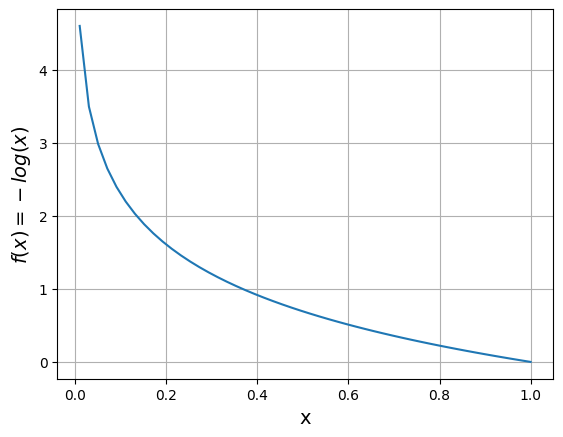

In [8]:
x = np.linspace(0.01, 1)
y =  -np.log(x)

plt.plot(x, y)
plt.grid(True)
plt.xlabel('x', fontsize=14)
plt.ylabel('$f(x) = - log(x)$', fontsize=14)
plt.show()

Como sabemos la función de pérdida no sólo sirve para calcular el error de nuestro modelo, si no también para su entrenamiento. Para ello necesitamos calcular la derivada de la función de pérdida con respecto a los pesos de nuestro modelo. En este caso es un poco más complicado que para la *MSE*, pero con un poco de matemáticas llegamos a la siguiente expresión:

$$ \frac{\partial J}{\partial w_i} =  \frac{1}{N} \sum^{N}_{j=1} (\sigma(\mathbf{w} \cdot \mathbf{x}^{(i)}) - y^{(i)})x^{(j)}_i $$

Este proceso exactamente la misma expresión que obtenemos al calcular la derivada de la *MSE* en el caso del `Perceptrón` con función de activación lineal que ya utilizamos para tareas de `regresión`. Esto nos simplifica las cosas a la hora de hacer nuestra implementación.

### 2.3 Implementación del Modelo

Vamos a mejorar la implementación del Perceptrón del post anterior para que ahora también sea capaz de funcionar como un modelo de regresión logística.

In [78]:
#? Funciones que se aplican para diferentes modelos en redes neuronales 

# funciones de pérdida

def mse(y, y_hat):
    return np.mean((y_hat - y)**2)

# Función de perdida para regresión logistica
def bce(y, y_hat):
    return - np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))



# funciones de activación

def linear(x):
    return x

def step(x):
    return x > 0

def sigmoid(x):
  return 1 / (1 + np.exp(-x))


### 2.4 Creamos el Perceptron

In [76]:
# Inicializamos el Perceptron
class Perceptron():
    
    # activacion -> la funcion de activacion a utilizar (por ejemplo, sigmoid, relu, etc.)
    # loss -> la funcion de perdida a utilizar (por ejemplo, mse, bce, etc.)
    def __init__(self, size, activacion, loss):
        self.w = np.random.randn(size)
        self.ws = []
        self.activacion = activacion
        self.loss = loss
        
    
    def __call__(self, w, X):
        return self.activacion(np.dot(X, w))
    
    
    def fit(self, X, y, epochs, lr):
        X = np.c_[np.ones(len(X)), X]
        
        for epoch in range(epochs):
            # Batch Gradient Descent - Descenso por el gradiente en lotes
            y_hat = self(self.w, X)
            
            # Función de pérdida
            l = self.loss(y, y_hat)
            
            # Derivadas
            dldh = (y_hat - y)
            dhdw = X
            dldw = np.dot(dldh, dhdw)
            
            # Actualizar pesos
            self.w = self.w - lr * dldw
            
            # Guardar pesos para graficar
            self.ws.append(self.w)

In [10]:
print(X_train_norm.shape)
print(X_norm.shape)
print(X_norm_2.shape)

print(y_train.shape)

(32000, 40)
(32000, 40)
(32000, 40)
(32000,)


### 2.5 Entrenamiento del la Red Neuronal

Ahora con los datos de entrenamiento, vamos a aplicar el Perceptron para un modelo de regresión logística binaria. 

In [84]:
# Entrenamiento del Perceptron

# Establece la semilla aleatoria para generar números pseudoaleatorios. Esto garantiza que los resultados sean reproducibles.
np.random.seed(42) 
n = X_train_norm.shape[1] + 1 # número de características

perceptron = Perceptron(n, sigmoid, bce)
epochs = 50 # número de iteraciones
lr = 0.0001 # tasa de aprendizaje

perceptron.fit(X_train_norm, y_train, epochs, lr)

In [22]:
from matplotlib import animation, rc
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(['#9898ff', '#fafab0'])
rc('animation', html='html5')

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, autoscale_on=False)
def plot(i, axes = [0, 5, 0, 2], label="Iris Setosa"):
    ax.clear()
    w = perceptron.ws[i]
    tit = ax.set_title(f"Epoch {i+1}", fontsize=14)
    x0, x1 = np.meshgrid(
            np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
            np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
        )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    X_new = np.c_[np.ones(len(X_new)), X_new] 
    y_predict = perceptron(w, X_new)
    zz = y_predict.reshape(x0.shape)
    ax.plot(X_train[y==0, 0], X_train[y==0, 1], "bs", label=f"No {label}")
    ax.plot(X_train[y==1, 0], X_train[y==1, 1], "yo", label=label)
    ax.contourf(x0, x1, zz, cmap=custom_cmap)
    ax.set_xlabel("Petal length", fontsize=14)
    ax.set_ylabel("Petal width", fontsize=14)
    ax.legend(loc="lower right", fontsize=14)
    ax.axis(axes)
    return ax

anim = animation.FuncAnimation(fig, plot, frames=epochs, interval=200)
plt.close()
anim

### Prueba de Predicciones

Ahora podemos usar nuestro modelo entrenado para asignar probabilidades de que ciertos prestamos emitidos serán capaces de incumplir con las deudas.

In [80]:
# Obtenemos los ultimos pesos calculados
w = perceptron.ws[-1]
w

array([ 0.19998346, -1.15465086, -0.36869803,  0.50688932, -0.20367312,
       -0.15829728,  0.0101958 , -0.00424647, -0.30670917,  0.09449231,
        0.20172361, -0.23097138, -0.10963683, -0.69335925, -0.50529994,
       -0.62441954, -1.07406995,  0.04654816,  0.0229982 , -0.12171786,
        0.72827095, -0.86860311, -0.05339151,  0.05348283,  0.02528317,
        0.11092259, -0.32190827,  0.01973533, -0.10386773, -0.04052002,
        0.08107058, -0.21894251,  0.08543335,  0.01994202, -0.02075593,
       -0.30352778, -0.03132681, -0.44391547, -0.08461718, -0.12642245,
       -0.07174678])

# 5. Evaluación del modelo

### Prueba de predicciones con los datos de prueba con el 20% de los datos

In [81]:
# Normaliza los datos de prueba utilizando el mismo scaler que usaste para los datos de entrenamiento
X_test_norm = scaler.transform(X_test)

# Agregamos la columna de unos,  Agrega un 1 al inicio para el término de sesgo
X_test_norm = np.c_[np.ones(len(X_test_norm)), X_test_norm]

# Realiza las predicciones utilizando el modelo entrenado y los datos de prueba normalizados
predictions = []
for x_new in X_test_norm:
    y_pred = perceptron(w, x_new)
    predictions.append(y_pred)

# Convierte las predicciones a etiquetas binarias (0 o 1) utilizando un umbral (por ejemplo, 0.5)
predicciones = [1 if pred >= 0.5 else 0 for pred in predictions]

# Imprime o muestra las predicciones
print("Predicciones:")
print(predicciones)


Predicciones:
[1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1

Mostramos una tabla donde verificamos las predicciones que se realizó y comparando los resultados

In [82]:
# Crear DataFrame de predicciones con el mismo índice que X_test y y_test
Y_predicciones = pd.DataFrame({'Y-(predicciones)': predicciones}, index=X_test.index)

# Crear DataFrame de y_test con nombre de columna 'Y-(loan_status)'
Y_test = pd.DataFrame({'Y-(loan_status)': y_test}, index=X_test.index)

# Concatenar X_test, Y_test y Y_predicciones
tabla_result = pd.concat([X_test, Y_test, Y_predicciones], axis=1)

# Mostrar las primeras filas de tabla_result
tabla_result.head(30)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,...,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,Y-(loan_status),Y-(predicciones)
32823,5000,5000,5000.0,7.39,48000.0,12.28,1.0,8,0,1310.0,...,1.0,3.0,894.0,63.0,19100.0,2.0,0.0,1.0,1,1
16298,25000,25000,25000.0,15.99,160000.0,21.26,0.0,21,1,627.0,...,4.0,8.0,624.0,28.0,23200.0,0.0,0.0,4.0,0,0
28505,17000,17000,17000.0,6.49,75000.0,16.22,0.0,7,0,22601.0,...,0.0,0.0,8613.0,66.0,39400.0,0.0,2.0,0.0,0,0
6689,2400,2400,2400.0,19.99,124500.0,15.67,4.0,13,5,13928.0,...,4.0,5.0,1503.0,77.0,16300.0,5.0,0.0,10.0,0,1
26893,5000,5000,5000.0,11.49,18000.0,5.60,0.0,3,0,2473.0,...,0.0,0.0,1793.0,71.0,3500.0,0.0,0.0,0.0,1,1
36572,30000,30000,30000.0,14.85,150000.0,23.35,0.0,12,0,57277.0,...,2.0,3.0,30252.0,64.0,71300.0,0.0,1.0,0.0,1,0
12335,21400,21400,21400.0,19.03,26000.0,44.04,0.0,8,0,8416.0,...,0.0,0.0,1652.0,76.0,10800.0,1.0,0.0,1.0,0,0
29591,26000,26000,26000.0,7.21,85000.0,31.87,0.0,12,0,21822.0,...,0.0,0.0,15407.0,64.0,28800.0,0.0,0.0,0.0,1,0
18948,40000,40000,40000.0,15.05,110000.0,11.48,0.0,11,1,30002.0,...,2.0,2.0,7656.0,75.0,39800.0,0.0,1.0,2.0,0,0
31067,13275,13275,13275.0,24.74,44299.0,29.23,3.0,11,1,10999.0,...,0.0,2.0,0.0,73.0,19200.0,2.0,8.0,10.0,0,0


### Métricas

Vamos a ver las métricas más utilizadas en la evaluación de modelos de clasificación binaria. Para calcular cualquier métrica vamos a necesitar ser capaces de generar predicciones con nuestro modelo. En posts anterior ya hemos visto cómo podemos hacerlo.

In [161]:
def evaluate(perceptron, x, t = 0.5):
    w = perceptron.ws[-1]
    x = np.c_[np.ones(len(x)), x]
    y = perceptron(w, x)
    return (y > t).astype(np.int)

### Prueba de Accuracy (Presición del modelo)

La primera métrica que vamos a ver, también la más común, es la *accuracy* (o precisión). En esta métrica simplemente contamos todos los elementos del dataset que nuestro modelo ha sido capaz de clasificar correctamente y lo dividimos entre el número total de elementos. Ésto implica que la precisión será un valor entre $0$ y $1$, significando $0$ que nuestro modelo no ha acertado ningún resultado y $1$ que los ha acertado todos. También es común dar este valor en porcentaje (simplemente multiplicando por $100$ el resultado anterior).

In [83]:
def accuracy(y_pred, y):
    return np.sum(y_pred == y) / len(y)


precision = accuracy(predicciones, y_test)

print(f"La precisión del modelo es: {precision * 100:.2f}%")

La precisión del modelo es: 50.36%


# CONCLUSIÓN

En este post hemos introducido el modelo de regresión logística. Cómo hemos visto, este modelo no es más que nuestro ya conocido Perceptrón con una función de activación de tipo Sigmoid entrenado con la función de activación log-loss. De esta manera, nuestro modelo ahora será capaz no sólo de llevar a cabo la tarea de clasificación binaria si no también de darnos el grado de confianza con el que nos proporciona la predicción. Esto lo conseguimos gracias a la función de activación, que convierte la salida del Perceptrón en una probabilidad (un valor entre  0  y  1 ). 

Tambien debemos tomar en cuenta que el modelo está a una presición de 50% ya que se trata de un problema de clasificación binaria. Para mejorar la precisión del modelo, podemos probar con diferentes algoritmos de clasificación o ajustar los hiperparámetros del modelo de regresión logística y tambien aplicar la Regularización para evitar el overfitting.

## =================================================================================================================================

# ***REGURALIZACIÓN***

## Dividimos el dataset para diferentes pruebas

Dividimos los datos donde el 80% de los datos del dataset seran para el entrenamiento del modelo, mientras que el 20% restante del dataset sera usando para hacer las pruebas y validaciones correspondientes.

In [37]:
# Leemos los datos del dataset
data = pd.read_csv('./lc_2016_2017_proces.csv', delimiter=',')

# Aplicando la libreria, separamos los datos del 80% y 20% del Dataset
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Dividimos los datos para X_test y y_test_reg donde seran los datos para el prueba 
X_test_reg = test_data.drop(['loan_status'], axis=1)
y_test_reg = test_data['loan_status']

# Dividimos los datos para X_train y y_train_reg donde seran los datos para el entrenamiento
X_train_reg = train_data.drop(['loan_status'], axis=1)
y_train_reg = train_data['loan_status']
m_train = len(y_train_reg)

## 1.2 Normalización de los datos

Escala las características para que tengan un rango similar, lo que puede mejorar el rendimiento y la convergencia del modelo.

In [38]:

# Inicializa el objeto StandardScaler
scaler = StandardScaler()

# Ajusta el scaler en los datos de entrenamiento y transforma los datos
X_train_reg_norm = scaler.fit_transform(X_train_reg)

# Aplica la misma transformación a los datos de prueba
X_test_reg_norm = scaler.transform(X_test_reg)

In [39]:
# Mostramos los datos normalizados
X_train_reg_norm

array([[-0.18388986, -0.18388986, -0.18336197, ...,  3.46937607,
         0.96834852,  1.23625869],
       [-1.07604247, -1.07604247, -1.07574356, ...,  1.40717379,
        -0.55475462,  0.38860807],
       [ 0.57770384,  0.57770384,  0.57842719, ..., -0.65502848,
        -0.55475462, -0.88286785],
       ...,
       [-0.94548355, -0.94548355, -0.94515113, ..., -0.65502848,
        -0.55475462, -0.45904254],
       [-0.51028715, -0.51028715, -0.50984304, ...,  0.03237228,
        -0.55475462, -0.45904254],
       [-0.891084  , -0.891084  , -0.89073762, ...,  0.03237228,
        -0.17397884,  0.38860807]])

## 2. Implementación del Modelo

Vamos a mejorar la implementación del Perceptrón del post anterior para que ahora también sea capaz de funcionar como un modelo de regresión logística.

## Función de Activación y Función de pérdida

In [48]:
#? Funciones que se aplican para diferentes modelos en redes neuronales 

# Función de perdida para regresión logistica de forma regularizada
# def bce_regularizacion(y, y_hat, w, lambda_reg):
#     m = len(y)
#     loss = - np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
#     regularizacion_term = (lambda_reg / (2 * m)) * np.sum(w ** 2)
#     return loss + regularizacion_term


def bce_regularizacion(y, y_hat, w, lambda_reg):
    m = len(y)
    epsilon = 1e-10  # Pequeño valor epsilon para evitar log(0)
    
    # Calcular la pérdida de entropía cruzada binaria
    loss = - np.mean(y * np.log(y_hat + epsilon) + (1 - y) * np.log(1 - y_hat + epsilon))
    
    # Calcular el término de regularización L2
    regularizacion_term = (lambda_reg / (2 * m)) * np.sum(w ** 2)
    
    # Combinar la pérdida y el término de regularización
    return loss + regularizacion_term


# funciones de activación

def step(x):
    return x > 0

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

## 2.4 Creamos el Perceptron

In [42]:
# Inicializamos el Perceptron
class Perceptron():
    
    # activacion -> la funcion de activacion a utilizar (por ejemplo, sigmoid, relu, etc.)
    # loss -> la funcion de perdida a utilizar (por ejemplo, mse, bce, etc.)
    def __init__(self, size, activacion, loss):
        self.w = np.random.randn(size)
        self.ws = []
        self.activacion = activacion
        self.loss = loss
        
    
    def __call__(self, w, X):
        return self.activacion(np.dot(X, w))
    
    
    def fit(self, X, y, epochs, lr, lambda_reg):
        X = np.c_[np.ones(len(X)), X] # Agregar una columna de unos para el sesgo (bias)
        
        m = len(y)
        
        for epoch in range(epochs):
            # Batch Gradient Descent - Descenso por el gradiente en lotes
            # Realizar predicción
            y_hat = self(self.w, X)
            
            # Calcular la función de pérdida con regularización L2
            loss = self.loss(y, y_hat, self.w, lambda_reg)  # Función de pérdida regularizada
            
            # Calcular derivadas (gradiente) con regularización L2
            dldh = (y_hat - y)
            dhdw = X
            
            # Metod 1
            # dldw = (1 / m) * np.dot(dhdw, dldh) + (lambda_reg / m) * self.w
            
            # -- metodo 2
            dldw = (1 / m) * np.dot(dldh, dhdw)
            regularizacion = (lambda_reg / m) * self.w  # Término de regularización para el gradiente
            dldw = dldw + regularizacion  # Sumar el término de regularización al gradiente
            
            # Actualizar pesos utilizando descenso por el gradiente
            self.w = self.w - lr * dldw
            
            # Guardar pesos para graficar
            self.ws.append(self.w)

## 2.5 Entrenamiento del la Red Neuronal

Ahora con los datos de entrenamiento, vamos a aplicar el Perceptron para un modelo de regresión logística binaria. 

In [70]:
# Entrenamiento del Perceptron

# Establece la semilla aleatoria para generar números pseudoaleatorios. Esto garantiza que los resultados sean reproducibles.
np.random.seed(42) 
n_reg = X_train_reg_norm.shape[1] + 1 # número de características

perceptron_reg = Perceptron(n_reg, sigmoid, bce_regularizacion)

epochs = 500 # número de iteraciones #50
lr = 0.001 # tasa de aprendizaje # 0.01
lambda_reg = 0.01 # factor de regularización # 0.1

perceptron_reg.fit(X_train_reg_norm, y_train_reg, epochs, lr, lambda_reg)

### Prueba de Predicciones

Ahora podemos usar nuestro modelo entrenado para asignar probabilidades de que ciertos prestamos emitidos serán capaces de incumplir con las deudas.

In [71]:
# Obtenemos los ultimos pesos calculados
w_reg = perceptron_reg.ws[-1]
w_reg

array([ 0.45580803, -0.02831349,  0.75763923,  1.6329989 , -0.23026341,
       -0.15890758,  1.55670232,  0.73922561, -0.44168726,  0.51128966,
       -0.38138701, -0.43544289,  0.26124119, -1.79180822, -1.60344368,
       -0.5280913 , -0.97861506,  0.33095488, -0.82134762, -1.39047461,
        1.44464131, -0.24666021,  0.05215953, -1.38840709, -0.51697078,
        0.11092257, -1.08241335,  0.36093964, -0.61210047, -0.30388173,
       -0.56789661,  1.83035849, -0.03859959, -1.06143443,  0.80716758,
       -1.12349079,  0.19781329, -1.87030107, -1.31593891,  0.19311594,
        0.71759799])

# 3. Evaluación del modelo

### Prueba de predicciones con los datos de prueba con el 20% de los datos

In [72]:
# Normaliza los datos de prueba utilizando el mismo scaler que usaste para los datos de entrenamiento
X_test_reg_norm = scaler.transform(X_test_reg)

# Agregamos la columna de unos,  Agrega un 1 al inicio para el término de sesgo
X_test_reg_norm = np.c_[np.ones(len(X_test_reg_norm)), X_test_reg_norm]

# Realiza las predicciones utilizando el modelo entrenado y los datos de prueba normalizados
predictions_reg = []
for x_new_reg in X_test_reg_norm:
    y_pred = perceptron_reg(w_reg, x_new_reg)
    predictions_reg.append(y_pred)

# Convierte las predicciones a etiquetas binarias (0 o 1) utilizando un umbral (por ejemplo, 0.5)
predicciones_reg = [1 if pred >= 0.5 else 0 for pred in predictions_reg]

# Imprime o muestra las predicciones_reg
print("Predicciones:")
print(predicciones_reg)


Predicciones:
[1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0

In [73]:
# Crear DataFrame de predicciones con el mismo índice que X_test y y_test
Y_predicciones_reg = pd.DataFrame({'Y-(predicciones)': predicciones_reg}, index=X_test_reg.index)

# Crear DataFrame de y_test con nombre de columna 'Y-(loan_status)'
Y_test_reg = pd.DataFrame({'Y-(loan_status)': y_test_reg}, index=X_test_reg.index)

# Concatenar X_test, Y_test_reg y Y_predicciones_reg
tabla_result_reg = pd.concat([X_test_reg, Y_test_reg, Y_predicciones_reg], axis=1)

# Mostrar las primeras filas de tabla_result_reg
tabla_result_reg.head(30)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,...,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,Y-(loan_status),Y-(predicciones)
32823,5000,5000,5000.0,7.39,48000.0,12.28,1.0,8,0,1310.0,...,1.0,3.0,894.0,63.0,19100.0,2.0,0.0,1.0,1,1
16298,25000,25000,25000.0,15.99,160000.0,21.26,0.0,21,1,627.0,...,4.0,8.0,624.0,28.0,23200.0,0.0,0.0,4.0,0,0
28505,17000,17000,17000.0,6.49,75000.0,16.22,0.0,7,0,22601.0,...,0.0,0.0,8613.0,66.0,39400.0,0.0,2.0,0.0,0,1
6689,2400,2400,2400.0,19.99,124500.0,15.67,4.0,13,5,13928.0,...,4.0,5.0,1503.0,77.0,16300.0,5.0,0.0,10.0,0,1
26893,5000,5000,5000.0,11.49,18000.0,5.60,0.0,3,0,2473.0,...,0.0,0.0,1793.0,71.0,3500.0,0.0,0.0,0.0,1,1
36572,30000,30000,30000.0,14.85,150000.0,23.35,0.0,12,0,57277.0,...,2.0,3.0,30252.0,64.0,71300.0,0.0,1.0,0.0,1,0
12335,21400,21400,21400.0,19.03,26000.0,44.04,0.0,8,0,8416.0,...,0.0,0.0,1652.0,76.0,10800.0,1.0,0.0,1.0,0,1
29591,26000,26000,26000.0,7.21,85000.0,31.87,0.0,12,0,21822.0,...,0.0,0.0,15407.0,64.0,28800.0,0.0,0.0,0.0,1,0
18948,40000,40000,40000.0,15.05,110000.0,11.48,0.0,11,1,30002.0,...,2.0,2.0,7656.0,75.0,39800.0,0.0,1.0,2.0,0,0
31067,13275,13275,13275.0,24.74,44299.0,29.23,3.0,11,1,10999.0,...,0.0,2.0,0.0,73.0,19200.0,2.0,8.0,10.0,0,1


### Prueba de Accuracy (Presición del modelo)

La primera métrica que vamos a ver, también la más común, es la *accuracy* (o precisión). En esta métrica simplemente contamos todos los elementos del dataset que nuestro modelo ha sido capaz de clasificar correctamente y lo dividimos entre el número total de elementos. Ésto implica que la precisión será un valor entre $0$ y $1$, significando $0$ que nuestro modelo no ha acertado ningún resultado y $1$ que los ha acertado todos. También es común dar este valor en porcentaje (simplemente multiplicando por $100$ el resultado anterior).

In [74]:
def accuracy(y_pred, y):
    return np.sum(y_pred == y) / len(y)


precision_reg = accuracy(predicciones_reg, y_test_reg)

print(f"La precisión del modelo es: {precision_reg * 100:.2f}%")

La precisión del modelo es: 51.20%


# CONCLUSIÓN, Qué se pudo observar con respecto a la Regularización?

En este post hemos introducido el modelo de regresión logística. Cómo hemos visto, este modelo no es más que nuestro ya conocido Perceptrón con una función de activación de tipo Sigmoid entrenado con la función de activación log-loss. De esta manera, nuestro modelo ahora será capaz no sólo de llevar a cabo la tarea de clasificación binaria si no también de darnos el grado de confianza con el que nos proporciona la predicción. Esto lo conseguimos gracias a la función de activación, que convierte la salida del Perceptrón en una probabilidad (un valor entre  0  y  1 ). 

Tambien debemos tomar en cuenta que el modelo está a una presición de 51.22% esto aplicando la regularización donde tratamos de evitar el overfit, pero viendo el modelo donde hicimos sin aplicar la regularización vimo que tiene la misma preción solo que varia esta vez con decimales. Para mejorar la precisión del modelo, podemos probar con diferentes algoritmos de clasificación o ajustar los hiperparámetros del modelo de regresión logística y ir probando con diferentes entradas para optimizar el modelo.